<a href="https://colab.research.google.com/github/wales101/don/blob/master/Recurrent_neural_network_using_sine_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

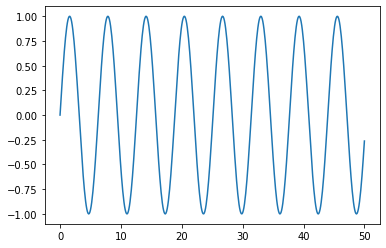

Epoch 1/5
401/401 [==============================] - 24s 59ms/step - loss: 0.0068
Epoch 2/5
401/401 [==============================] - 22s 55ms/step - loss: 8.9991e-05
Epoch 3/5
401/401 [==============================] - 20s 51ms/step - loss: 1.0177e-04
Epoch 4/5
401/401 [==============================] - 21s 51ms/step - loss: 3.6761e-05
Epoch 5/5
401/401 [==============================] - 21s 52ms/step - loss: 1.5206e-04
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


C:\Users\issax\anaconda3\lib\site-packages\ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


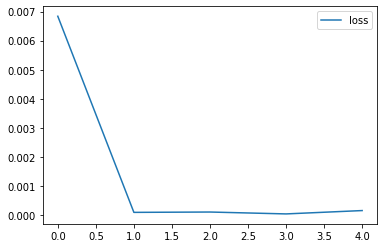

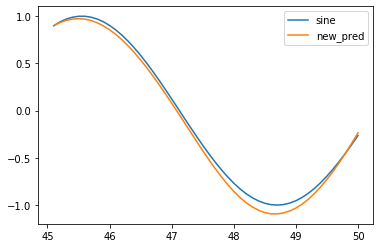

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


x = np.linspace(0, 50, 501)

y = np.sin(x)

plt.plot(x, y)
plt.show()


df = pd.DataFrame(y, index=x, columns=['sine'])

df.head()

#i am using 10% of my data for testing and the remaining 90% for training

perc = 0.1

no_left = int(len(df) * perc)
ind = len(df) - no_left

train = df.iloc[:ind]
test = df.iloc[ind:]

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

length = 50

gen = TimeseriesGenerator(scaled_train, scaled_train, batch_size=1, length=length)



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

n_feature = 1
model = Sequential()
model.add(SimpleRNN(50, input_shape=(length, n_feature)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit_generator(gen, epochs=5)

loss = pd.DataFrame(model.history.history)

loss.plot()

model.summary()



first_eval_batch = scaled_train[-length:]

prediction = []

current_batch = first_eval_batch.reshape(1, length, n_feature)

for i in range(len(test)):

  my_pred = model.predict(current_batch)[0]
  prediction.append(my_pred)
  current_batch = np.append(current_batch[:,1:,:], [[my_pred]], axis=1)

pred = scaler.inverse_transform(prediction)

test['new_pred'] = pred

test.plot()

In [ ]:
length = 49

generator = TimeseriesGenerator(scaled_train, scaled_train, batch_size=1, length=length)

gen_val = TimeseriesGenerator(scaled_test, scaled_test, batch_size=1, length=length)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_feature)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

early = EarlyStopping(monitor='val_loss', patience=2)

model.fit_generator(generator, epochs=10, validation_data=gen_val, callbacks=[early])

Epoch 1/10
402/402 [==============================] - 35s 87ms/step - loss: 0.0173 - val_loss: 9.7112e-05
Epoch 2/10
402/402 [==============================] - 38s 93ms/step - loss: 6.1048e-05 - val_loss: 3.4245e-06
Epoch 3/10
402/402 [==============================] - 37s 92ms/step - loss: 1.6414e-04 - val_loss: 4.2618e-05
Epoch 4/10
402/402 [==============================] - 36s 89ms/step - loss: 8.8170e-05 - val_loss: 2.5522e-05


In [ ]:
df_scaled = scaler.transform(df)

In [ ]:
first_eval_batch = df_scaled[-length:]

forcast = []  #forcasting into the future

current_batch = first_eval_batch.reshape(1, length, n_feature)

for i in range(25):  #forcasting 25 sample into the future

  my_pred = model.predict(current_batch)[0]
  forcast.append(my_pred)
  current_batch = np.append(current_batch[:,1:,:], [[my_pred]], axis=1)

my_forcast = scaler.inverse_transform(forcast)



In [ ]:
new_index = np.arange(50.1, 52.6, step=0.1)

In [ ]:
new_forcast = pd.DataFrame(my_forcast, index=new_index, columns=['forcast'])

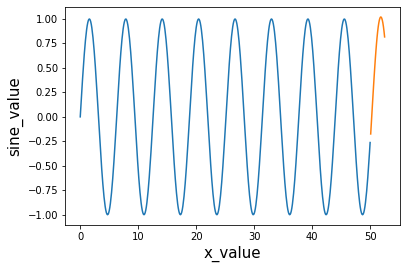

In [ ]:
%matplotlib inline

plt.plot(df.index, df.sine)
plt.plot(new_index, new_forcast.forcast)
plt.xlabel('x_value', fontsize=(15))
plt.ylabel('sine_value', fontsize=(15))
plt.show()

In [ ]:
#